### TASK - PERFORMING RANDOM FOREST CLASSIFICATION ALGORITHM ON IRIS DATA SET

### Random forest : 
- It's a supervised learning algorithm which is used for both classification as well as regression. 

- Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

### Is Random Forest an ensemble model?

- Random forest is an ensemble machine learning algorithm. 
- It is perhaps the most popular and widely used machine learning algorithm given its good or excellent performance across a wide range of classification and regression predictive modeling problems.

#### Advantages of Ensemble Algorithm: 

- Ensemble is a proven method for improving the accuracy of the model and works in most of the cases. 
- Ensemble makes the model more robust and stable thus ensuring decent performance on the test cases in most scenarios. 
- We can use ensemble to capture linear and simple as well nonlinear complex relationships in the data. 
- This can be done by using two different models and forming an ensemble of two. 


#### Disadvantages of Ensemble Algorithm: 

- Ensemble reduces the model interpret-ability and makes it very difficult to draw any crucial business insights at the end. 
- It is time-consuming and thus might not be the best idea for real-time applications. 
- The selection of models for creating an ensemble is an art which is really hard to master. 

### How does the Random forest algorithm work?

#### It works in four steps:

1. Select the prediction result with the most votes as the final prediction.Select random samples from a given dataset.

2. Construct a decision tree for each sample and get a prediction result from each decision tree.

3. Perform a vote for each predicted result.

4. Select the prediction result with the most votes as the final prediction.

### Building a Random Forest Classifier using Scikit-learn

#### We will be building a model on the iris flower dataset, which is a very famous classification set. 

1. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. 

2. There are three species or classes: setosa, versicolor, and virginia. You will build a model to classify the type of flower. 

3. The dataset is available in the scikit-learn library or you can download it from the UCI Machine Learning Repository.

### Why is random forest better than decision tree?

- But as stated, a random forest is a collection of decision trees. 
- With that, random forests are a strong modeling technique and much more robust than a single decision tree. 
- They aggregate many decision trees to limit overfitting as well as error due to bias and therefore yield useful results.

### Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris()

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

### You can print the target and feature names, to make sure you have the right dataset, as such:

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Here, you can create a DataFrame of the iris dataset the following way.

In [4]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data = pd.DataFrame({'sepal length':iris.data[:,0], 'sepal width':iris.data[:,1], 'petal length':iris.data[:,2],
    'petal width':iris.data[:,3], 'species':iris.target})

In [5]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### First, you separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set.

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

### After splitting, you will train the model on the training set and perform predictions on the test set.

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

### After training, check the accuracy using actual and predicted values.

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


### You can also make a prediction for a single item, for example:

#### sepal length = 3
#### sepal width = 5
#### petal length = 4
#### petal width = 2

### Now you can predict which type of flower it is.

In [12]:
clf.predict([[3, 5, 4, 2]])

array([2])

### Here, 2 indicates the flower type Virginica.

### Finding Important Features in Scikit-learn

#### Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [13]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal length (cm)    0.439209
petal width (cm)     0.434922
sepal length (cm)    0.094094
sepal width (cm)     0.031774
dtype: float64

#### You can also visualize the feature importance. Visualizations are easy to understand and interpretable.

#### For visualization, you can use a combination of matplotlib and seaborn.
- Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. 
- Matplotlib is a superset of seaborn and both are equally important for good visualizations.

#### %matplotlib: %matplotlib inline sets the backend of matplotlib to the 'inline' backend: 
- With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. 
- The resulting plots will then also be stored in the notebook document.

No handles with labels found to put in legend.


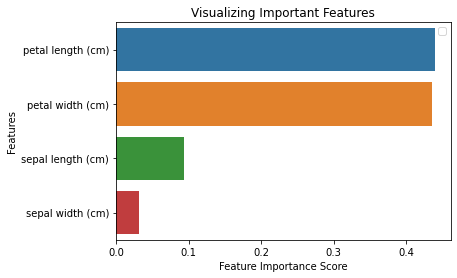

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.legend()

plt.show()

### Generating the Model on Selected Features
- Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [17]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into features and labels
X = data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y = data['species']                                       

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 5) # 70% training and 30% test

ModuleNotFoundError: No module named 'sklearn.cross_validation'

### After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values.

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9111111111111111


#### We can see that after removing the least important features (sepal length), the accuracy increased. This is because you removed misleading data and noise, resulting in an increased accuracy. 

#### A lesser amount of features also reduces the training time.

### Advantages of Random Forest:

1. Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

2. It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

3. The algorithm can be used in both classification and regression problems.

4. Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

5. You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

### Disadvantages of Random Forest:

1. Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.

2. The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

### Random Forests vs Decision Trees

1. Random forests is a set of multiple decision trees.

2. Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.

3. Decision trees are computationally faster.

4. Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.